# Задача анализа A/B тестов 

1) A/B-тест с категориальной метерикой (метрикой пропорции)

In [36]:
# импортируем нужные библиотеки
import pandas as pd

In [37]:
# создаем датафрейм с результатами A/B-теста
df = pd.DataFrame({'impressions': [5127, 5127],
                   'clicks': [1145,1250]},
                  index=['var_A', 'var_B'])
df.head()

,impressions,clicks
var_A,5127,1145
var_B,5127,1250


In [38]:
# создаем таблицу сопряженности на основе результатов A/B-теста
df['no_clicks'] = df['impressions'] - df['clicks']
df = df.drop(['impressions'], axis = 1)
df.head()

,clicks,no_clicks
var_A,1145,3982
var_B,1250,3877


In [40]:
# определяем значимость аб-теста
import scipy.stats as stats
result = stats.chi2_contingency(df, correction = False)
chi2, p = result[:2]
print('chi2 = {}, p = {}'.format(chi2, p))

chi2 = 6.0061905276744785, p = 0.014255771852168957


Вывод: поскольку значимость A/B теста 0.014 менее допустимого уровня значимости 0,05, то нулевую гипотезу о равенстве конверсий в группах можно отклонить, т.е. группа B -действительно генерирует статистически больше кликов, чем группа A

2) A/B - тест с числовой метрикой

In [5]:
# создаем датафрейм на основе словаря
df = pd.DataFrame({'Day': [1,2,3,4,5,6,7,8,9,10],
                   'Conversion_A': [0.15,0.12,0.18,0.19,0.17,0.13,0.14,0.23,0.11,0.15],
                   'Conversion_B': [0.19,0.20,0.18,0.22,0.19,0.17,0.18,0.20,0.17,0.22]})
df.head()


,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19


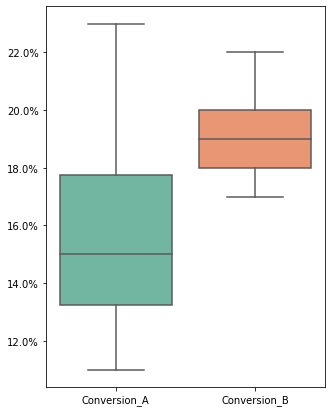

In [12]:
# визуализируем наличие различий в группах аб-теста
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
plt.figure(figsize=(5, 7))
ax = sns.boxplot(data=df[['Conversion_A','Conversion_B']], palette="Set2")
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

In [13]:
# считаем значимость различий по аб-тесту
import scipy.stats as stats
t_stat, p_val= stats.ttest_ind(df['Conversion_B'],df['Conversion_A'])
t_stat , p_val

(2.7321154763851614, 0.013684259842725968)

Вывод: поскольку значимость A/B теста 0.013 менее допустимого уровня значимости 0,05, то нулевую гипотезу о равенстве конверсий в группах можно отклонить, т.е. группа B -действительно генерирует статистически больше покупателей, чем группа A

# Задача оптимизации

In [14]:
# Импортируем нужные бибилиотеки
import numpy as np

In [15]:
# Задаем целевую функцию:
# Компанией производится три вида продукции:
# x0 — продающие лэндинги, от 10 т.р.
# x1 — корпоративные сайты, от 20 т.р.
# x2 — интернет магазины, от 30 т.р.

def value(x):
    return - 10*x[0] - 20*x[1] - 30*x[2]

In [16]:
# Задаем систему ограничений:
# Дружный рабочий коллектив включает в себя четырех джунов, двух мидлов и одного сеньора. 
# Фонд их рабочего времени на месяц:
# джуны: 4 * 150 = 600 чел * час,
# мидлы: 2 * 150 = 300 чел * час,
# сеньор: 150 чел * час.

#Пусть на разработку и деплой одного сайта типа (x0, x1, x2) первый попавшийся джуниор 
# должен потратить (10, 20, 30) часов, мидл — (7, 15, 20), сеньор — (5, 10, 15) часов рабочего времен.

neq_cons = {'type': 'ineq',
             'fun': lambda x: np.array ([600 - 10 * x [0] - 20 * x [1] - 30 * x[2],
                                         300 - 7  * x [0] - 15 * x [1] - 20 * x[2],
                                         150 - 5  * x [0] - 10 * x [1] - 15 * x[2]])}

In [ ]:
# Формальное ограничение — выпуск продукции должен быть только положительным:
from scipy.optimize import Bounds
bnds = Bounds([0, 0, 0], [np.inf, np.inf, np.inf])

In [ ]:
# Максимизируем функцию ежемесячной прибыли
from scipy.optimize import minimize
x0 = np.array([10, 10, 10])
res = minimize(value, x0, method='SLSQP', constraints=neq_cons, bounds=bnds)
print(res.x)

[7.85714286 5.71428571 3.57142857]


In [ ]:
# Нестрого округлим до целых и посчитаем месячную загрузку гребцов при оптимальном раскладе продукции x = (8, 6, 3) :
print('джуны:', 8 * 10 + 6 * 20 + 3 * 30, 'чел.*час')
print('мидлы:', 8 * 7 + 6 * 15 + 3 * 20, 'чел.*час')
print('сеньор:', 8 * 5 + 6 * 10 + 3 * 15, 'чел.*час')
print('максимизированная прибыль составит:', -1*value([8, 6, 3]),'тыс.руб./месяц')

джуны: 290 чел.*час
мидлы: 206 чел.*час
сеньор: 145 чел.*час
максимизированная прибыль составит: 290 тыс.руб./месяц


Вывод: чтобы студия получала максимульную выручку, оптимально делать в месяц по 8 лэндингов, 6 средних сайтов и 3 магазина. Сеньор при этом должен работать 100% от фонда рабочего времени, загрузка мидлов составит примерно 2/3, джунов меньше половины.

# Задача аппроксимации

In [18]:
# импортируем нужные бибилиотеки
import pandas as pd
import numpy as np

In [19]:
# создаем датафрейм с помощью словаря - номер дня и кол-во удержанных пользователей сайта 
df = pd.DataFrame({'day': [0,1,7,14,21,30],
                   'retained': [100,55,38,26,21,14]})
df.head(6)

,day,retained
0,0,100
1,1,55
2,7,38
3,14,26
4,21,21
5,30,14


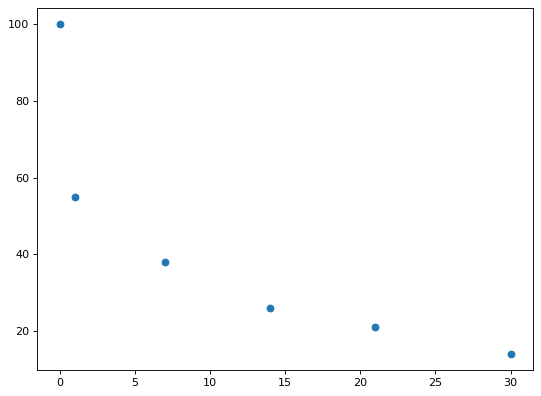

In [20]:
# определяем тип возможной кривой по диаграмме рассеяния
import matplotlib.pyplot as plt
#from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df['day'], df['retained'], label="Original Data" )

In [21]:
# задаем аппроксимирующую логарифмияескую функцию
def log_func( x, a, b, c ):
    return -a * np.log2( b + x ) + c

In [22]:
# задаем аппроксимирующую экспоненциальную функцию
def exp_func( x, a, b, c ):
    return a * np.exp( -b * x ) + c

In [23]:
# подбираем оптимальные параметры логарифмияеской функции
from scipy.optimize import curve_fit
log_popt, log_pcov = curve_fit(log_func, df['day'], df['retained'])

/Users/gleb_ganin/.conda/envs/scientificProject/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
# подбираем оптимальные параметры экспоненциальной функции
exp_popt, exp_pcov = curve_fit(exp_func, df['day'], df['retained'])

In [25]:
# задаем точку прогноза - сколько удержанных пользователей сайта останется на 90й день
projection_endpoint = 90

In [26]:
# задаем значения функции x с помощью метода np.arange и параметры подобранной кривой
log_y_projected = log_func( np.arange( projection_endpoint ), *log_popt )
exp_y_projected = exp_func( np.arange( projection_endpoint ), *exp_popt )

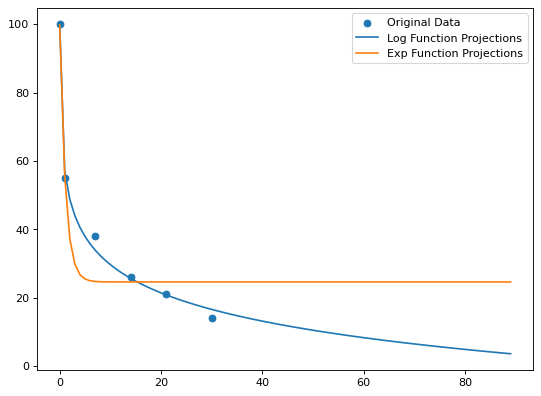

In [27]:
# смотрим график исходных данных и полученных кривых
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df['day'], df['retained'], label="Original Data" )
plt.plot( log_y_projected, label="Log Function Projections" )
plt.plot( exp_y_projected, label="Exp Function Projections" )
plt.legend()
plt.show()

In [28]:
# делаем прогноз удержанных пользователей сайта на 90й день
print('Прогноз кол-ва пользователей через 90 дней по log модели', round(log_y_projected[89],0))
print('Прогноз кол-ва пользователей через 90 дней по exp модели', round(exp_y_projected[89],0))

Прогноз кол-ва пользователей через 90 дней по log модели 4.0
Прогноз кол-ва пользователей через 90 дней по exp модели 25.0


In [29]:
# отбираем среди прогнозов значения за 0,1,7,14,21 и 30 дни
y_log_pred = [log_y_projected[ i ] for i in list(df['day'])]
y_log_pred

[99.96285584693737,
 56.900299939684935,
 33.95173162783922,
 25.700959415561613,
 20.868613292419482,
 16.61553987790169]

In [30]:
# отбираем среди прогнозов значения за 0,1,7,14,21 и 30 дни
y_exp_pred = [exp_y_projected[ i ] for i in list(df['day'])]
y_exp_pred

[99.84695355623178,
 55.43605252004692,
 24.78801944514217,
 24.64317800547473,
 24.642898504534656,
 24.642897964312926]

Вывод: логарифмическая функция аппроксимирует исследуемую зависимость с меньшей среднеквадратической ошибкой, поэтому целесообразнее использовать для прогноза только данную функцию.